In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [5]:
# Loading the csv data to a Pandas DataFrame
gold_data=pd.read_csv('D:\project\Gold Price\gld_price_data.csv')

In [6]:
# Print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print last 5 row in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and column
gold_data.shape

(2290, 6)

In [9]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :
1. positive Correlation 
2. Negative Correlation

In [14]:
correlation = gold_data.corr()

ValueError: could not convert string to float: '1/2/2008'

In [15]:
correlation = gold_data.select_dtypes(include='number').corr()


<Axes: >

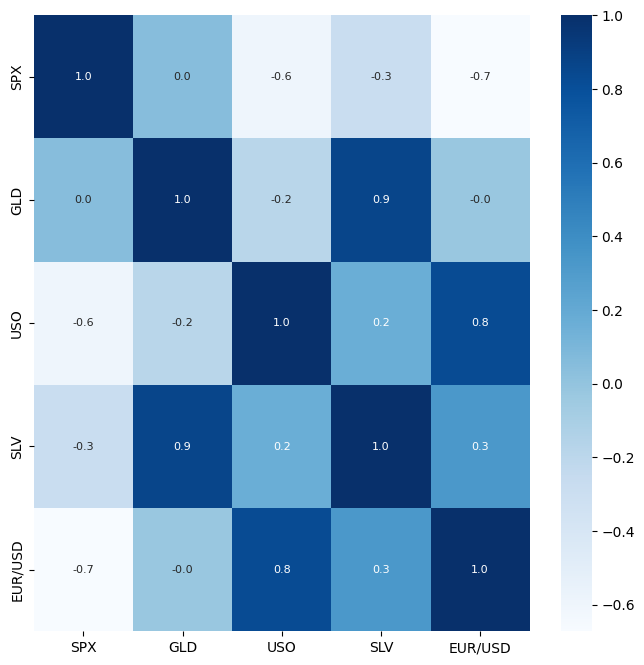

In [17]:
# constructing a heatm,ap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [18]:
# correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_7468\2694188238.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

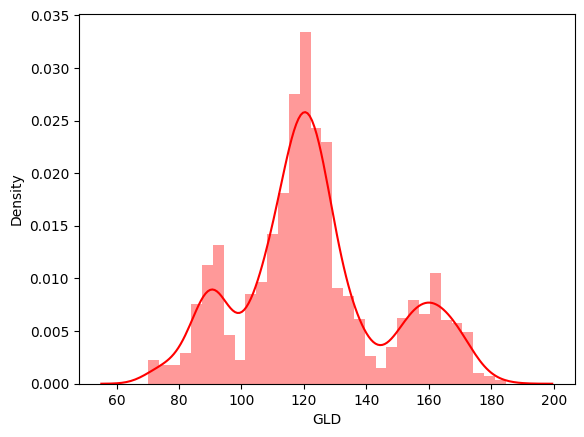

In [23]:
#check the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='red')

Splitting the features and target

In [24]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliting into Traning data and Test Data

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training: Random Forest Regressor

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evalution

In [32]:
# prediction on Test Data 
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[168.41149963  81.82329985 116.32770034 127.60940069 120.6328013
 154.70519726 149.99389784 126.13630054 117.57019869 125.92310086
 116.76270109 171.08640044 142.19149878 167.79279771 115.22480012
 117.5002006  139.65540362 170.03990106 159.44920226 161.05779897
 155.12510019 125.6445001  176.95949865 157.68940401 125.21850036
  93.76739958  77.25260022 120.58960008 119.10099967 167.49549969
  88.26880011 125.34250021  91.22150089 117.84239979 121.15899939
 136.45570137 115.32980117 115.21210089 146.15669971 107.31090129
 104.53850241  87.10279791 126.4676006  117.99279994 154.33149837
 119.59580019 108.36849995 108.16599849  93.10680055 127.14259779
  75.37820027 113.65169889 121.15319978 111.29099922 118.74149898
 120.90049942 158.85900018 167.43490111 146.93599686  85.86059848
  94.52380032  86.79689865  90.53710008 119.17130056 126.39800051
 127.6496     169.05820018 122.23179954 117.58499868  98.17400009
 168.50040162 142.95359821 132.04400283 121.14480253 121.46259947
 119.847700

In [34]:
# R Squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error : ",error_score)

R Squared error :  0.9894220063786133


Compare the Actual Value and Predicted Values in a Plot

In [35]:
Y_test = list(Y_test)

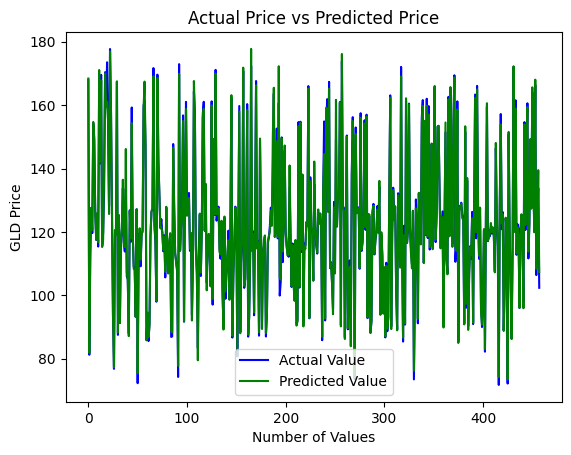

In [36]:
plt.plot(Y_test,color='blue',label = 'Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()